# Рынок заведений общественного питания Москвы

# Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

In [3]:
import pandas as pd
import seaborn as sbr
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [5]:
df = pd.read_csv(r'D:\pyhton\datasets\rest_data.csv')
#df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Описание данных**

**Таблица rest_data:**

**id** — идентификатор объекта;

**object_name** — название объекта общественного питания;

**chain** — сетевой ресторан;

**object_type** — тип объекта общественного питания;

**address** — адрес;

**number** — количество посадочных мест.

Посмотрим какие заведения не имеют посадочных мест

In [7]:
df.query('number == 0').object_type.value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

Выберу те заведения, где точно должны быть посадочные места и это однозначно ошибка, что у них в колонке number 0 

In [9]:
df = df.loc[~((df['number'] == 0) & ((df['object_type'] == "кафе") | (df['object_type'] == "кафетерий") | (df['object_type'] == "столовая ") | (df['object_type'] == "ресторан") | (df['object_type'] == "бар")))]

In [11]:
df.object_name = df.object_name.str.lower()

Думаю, с дубликатами нет смысла, что-то делать 

In [13]:
df.loc[df[['object_name', 'address']].duplicated(keep=False)]


,id,object_name,chain,object_type,address,number
113,28608,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",34
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
576,149218,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",40
579,149227,общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
...,...,...,...,...,...,...
15217,214146,макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15241,210885,kfc,да,предприятие быстрого обслуживания,"город Москва, Манежная площадь, дом 1, строение 2",41
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [15]:
df.number.describe() # посмотрел, что за чудное место с 1700 посадочными местами это оказался бар, думаю можно его удалить

count    14870.000000
mean        61.533423
std         75.164420
min          0.000000
25%         15.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [17]:
df = df.query('number < @df.number.quantile(0.98)')

Из-за слишком длинного названия "предприятие быстрого обслуживания" на графиках из-за него смещаются названия, так что я решил его переименовать

In [19]:
df.object_type = df.object_type.replace('предприятие быстрого обслуживания', 'фаст фуд')

**Вывод:**

C предобработкой можно закончить, среди заведений с 0 посадочных мест я удалил те, которые точно не могут существовать. Дубликаты, думаю смысла трогать не имеет. Также, я удалил выбросы в колонке number.

## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

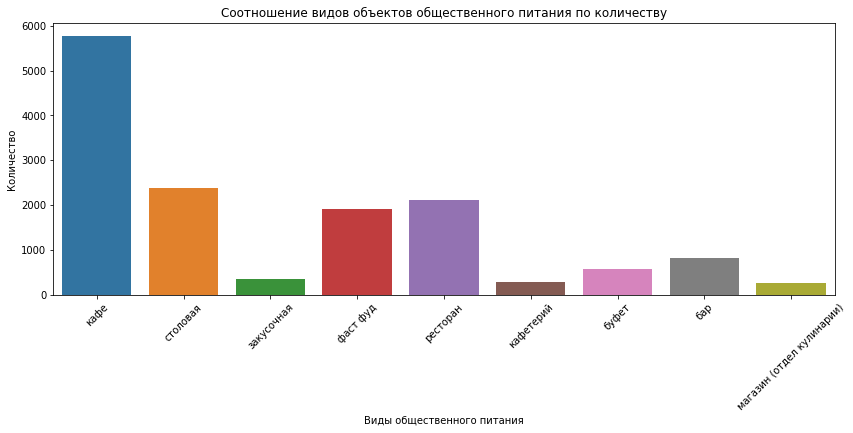

In [20]:
plt.figure(figsize=(14,5))
sbr.countplot(data=df, x='object_type')
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xlabel('Виды общественного питания')
plt.ylabel('Количество')

plt.xticks(rotation=45);

**Вывод:**

В предприятиях общественного питания преобладают кафе, столовых, фаст фудов и ресторанов почти одинаково, а вот кафетериев на удивление мало.


### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

В основном заведения не сетевые

In [22]:
px.pie(df.chain.value_counts().reset_index(), values='chain', names='index', title='Распределение количесва сетевых и не сетевых заведений')


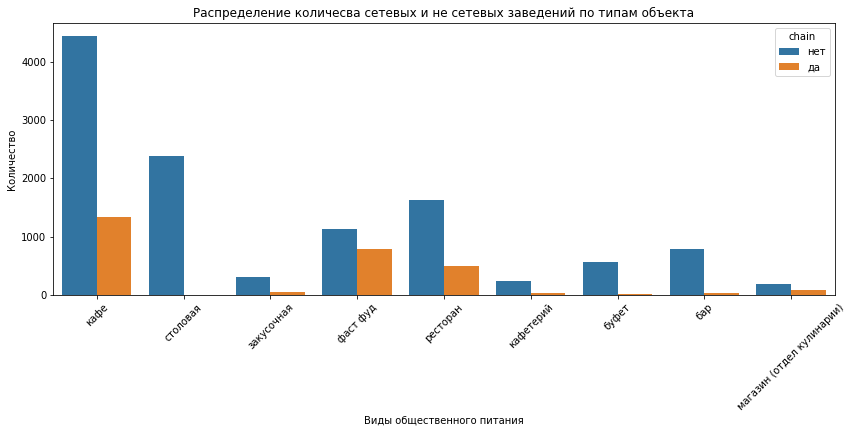

In [24]:
plt.figure(figsize=(14,5))
sbr.countplot(data=df, x='object_type', hue='chain')
plt.title('Распределение количесва сетевых и не сетевых заведений по типам объекта')
plt.xlabel('Виды общественного питания')
plt.ylabel('Количество')

plt.xticks(rotation=45);

**Вывод:**

Сетевых столовых в москве почти нет, а вот фастфуды почти сравнялись с не сетевыми.

In [26]:
df.address.str.split(',',expand=True).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14505 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14505 non-null  object
 1   1       14505 non-null  object
 2   2       14487 non-null  object
 3   3       6797 non-null   object
 4   4       419 non-null    object
 5   5       106 non-null    object
 6   6       1 non-null      object
dtypes: object(7)
memory usage: 1.4+ MB


### Для какого вида объекта общественного питания характерно сетевое распространение?

Для, фаст фудов и кафе.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [30]:
top_10_net_objekt = list(df.query('chain == "да"').object_name.value_counts().head(10).index)


In [33]:
df.query('chain == "да" and object_name in @top_10_net_objekt').number.mean()

41.945525291828794

In [35]:
g = df.query('chain == "да"').object_name.value_counts().mean()
not_popular_net_obj = list(df.query('chain == "да"').object_name.value_counts().reset_index().query('object_name < @g')['index'])
df.query('object_name in @not_popular_net_obj').number.mean()

54.34155363748459

**Вывод:**
В основном у сети немного заведений с большим количеством посадочных мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

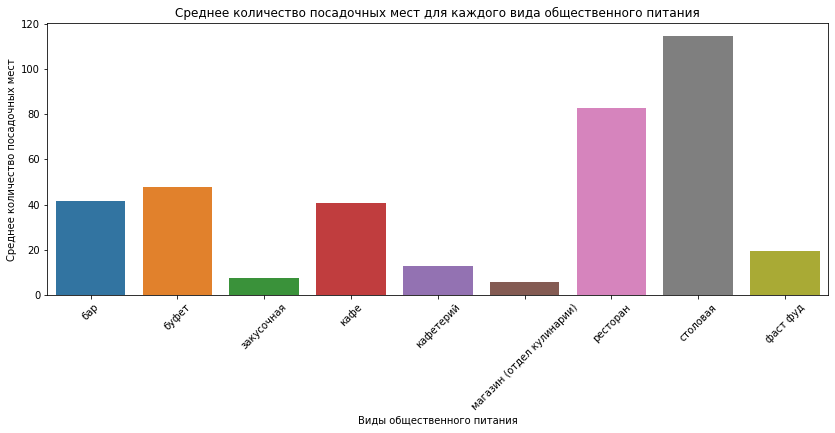

In [36]:
plt.figure(figsize=(14,5))
sbr.barplot(x="object_type", y="number", data=df.groupby('object_type').number.mean().reset_index())
plt.title('Среднее количество посадочных мест для каждого вида общественного питания')
plt.xlabel('Виды общественного питания')
plt.ylabel('Среднее количество посадочных мест')

plt.xticks(rotation=45)
plt.show()


**Вывод:**
Довольно очевидно оказалось, что в столовых самое большое количество посадочных мест

### Выделите в отдельный столбец информацию об улице из столбца address 

Тут начинается самое веселое, для выполнение следующих заданий мне пришлось прибегнуть к помощи апи here.com. выглядит это как-то так. Если хотите проверяйте, как работает. А я закину получившийся датасет в облако и отуда считаю

import requests
import json
import time
import zipfile
import io
from bs4 import BeautifulSoup
import lxml

g = df['address'].rename('searchText')
g.index.names = ['recId']

g.to_csv('filename1.csv',sep = ';')

filename = 'filename.csv'

class Batch:

    SERVICE_URL = "https://batch.geocoder.ls.hereapi.com/6.2/jobs"
    jobId = None

    def __init__(self, apikey="your_api_key"):
        self.apikey = apikey
        
            
    def start(self, filename, indelim=";", outdelim=";"):
        
        file = open(filename, 'rb')

        params = {
            "action": "run",
            "apiKey": self.apikey,
            "politicalview":"RUS",
            "gen": 9,
            "maxresults": "1",
            "header": "true",
            "indelim": indelim,
            "outdelim": outdelim,
            "outcols": "displayLatitude,displayLongitude,locationLabel,houseNumber,street,district,city,postalCode,county,state,country",
            "outputcombined": "true",
        }

        response = requests.post(self.SERVICE_URL, params=params, data=file)
        self.__stats (response)
        file.close()
    

    def status (self, jobId = None):

        if jobId is not None:
            self.jobId = jobId
        
        statusUrl = self.SERVICE_URL + "/" + self.jobId
        
        params = {
            "action": "status",
            "apiKey": self.apikey,
        }
        
        response = requests.get(statusUrl, params=params)
        self.__stats (response)
        

    def result (self, jobId = None):

        if jobId is not None:
            self.jobId = jobId
        
        print("Requesting result data ...")
        
        resultUrl = self.SERVICE_URL + "/" + self.jobId + "/result"
        
        params = {
            "apiKey": self.apikey
        }
        
        response = requests.get(resultUrl, params=params, stream=True)
        
        if (response.ok):    
            zipResult = zipfile.ZipFile(io.BytesIO(response.content))
            zipResult.extractall()
            print("File saved successfully")
        
        else:
            print("Error")
            print(response.text)
    

    
    def __stats (self, response):
        if (response.ok):
            parsedXMLResponse = BeautifulSoup(response.text, "lxml")

            self.jobId = parsedXMLResponse.find('requestid').get_text()
            
            for stat in parsedXMLResponse.find('response').findChildren():
                if(len(stat.findChildren()) == 0):
                    print("{name}: {data}".format(name=stat.name, data=stat.get_text()))

        else:
            print(response.text)

a = Batch('1OXhaK1RmQqaporg91QDoJdsGluiQSnsBO65kLOY1R4')

a.start(r'D:\pyhton\filename1.csv')

a.status('Po8mPUSpxJvPa2vO6cCFO6oLiM1aJ7AV')

m = a.result('Po8mPUSpxJvPa2vO6cCFO6oLiM1aJ7AV')

In [97]:
df2 = pd.read_csv('https://downloader.disk.yandex.ru/disk/93ca8fca2022c0f8bb90c2d310579c7f326c25fa250bb8792c19c90a5bda7bb6/6133e5a5/wPVNi0fXs8I1fDv8S_3aizCAmTecU4uWIwkPR9-VEzscdVGCpOOjFEuvHOl72JxjBTyaDbBsMyksp4Fso0-AIg%3D%3D?uid=0&filename=result_20210831-14-09_out.txt&disposition=attachment&hash=z%2BWDkP3lWoxtVQlYml6pVQ4lMQ5V8SPuvFFFQCTRJ7eSdVOVKdc2g1F10jfToNK2q/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=82306292&fsize=4041788&hid=b6cbd8636e8e9dc5d047ae68b412866f&media_type=document&tknv=v2', sep=';')
#df2 = pd.read_csv(r'D:\pyhton\result_20210831-14-09_out.txt', sep=';')
df2.head() #если не скачает вот ссылка на яндекс диск https://disk.yandex.ru/d/90UqjwdGlCyZfg

,recId,SeqNumber,seqLength,displayLatitude,displayLongitude,locationLabel,houseNumber,street,district,city,postalCode,county,state,country
0,0,1,1,55.87903,37.71453,"улица Егора Абакумова 9, Москва, Россия, 129347",9,улица Егора Абакумова,Ярославский,Москва,129347.0,Москва,Центральный федеральный округ,RUS
1,1,1,1,55.73810,37.67322,"улица Талалихина 2/1 корп 1, Москва, Россия, 1...",2/1 корп 1,улица Талалихина,Таганский,Москва,109147.0,Москва,Центральный федеральный округ,RUS
2,2,1,1,55.73558,37.66959,"Абельмановская улица 6, Москва, Россия, 109147",6,Абельмановская улица,Таганский,Москва,109147.0,Москва,Центральный федеральный округ,RUS
3,3,1,1,55.89278,37.57304,"Абрамцевская улица 1, Москва, Россия, 127576",1,Абрамцевская улица,Лианозово,Москва,127576.0,Москва,Центральный федеральный округ,RUS
4,4,1,1,55.90417,37.57233,"Абрамцевская улица 9 корп 1, Москва, Россия, 1...",9 корп 1,Абрамцевская улица,Лианозово,Москва,127572.0,Москва,Центральный федеральный округ,RUS


In [40]:
df = df.join(df2, how='left')[['object_name', 'chain', 'object_type', 'address', 'number', 'district', 'street', 'displayLatitude', 'displayLongitude']]

In [42]:
df.head()

,object_name,chain,object_type,address,number,district,street,displayLatitude,displayLongitude
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Ярославский,улица Егора Абакумова,55.87903,37.71453
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Таганский,улица Талалихина,55.73810,37.67322
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Таганский,Абельмановская улица,55.73558,37.66959
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Лианозово,Абрамцевская улица,55.89278,37.57304
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Лианозово,Абрамцевская улица,55.90417,37.57233


**Вывод:**

Я добавил столбцы районов, улиц и координат, чтобы выполненить следующие задания, для этого пришлось довольно долго веселится и попробовать несколько апи и регулярки, хотя последние в конце концов не пригодились. 

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Получаем топ 10 улиц

In [44]:
top10_street = list(df.street.value_counts().head(10).reset_index()['index'])

Получаем датафрейм в котором улицы только из топ 10

In [46]:
top10_df= df.query("street in @top10_street").copy()
top10_df.head()

,object_name,chain,object_type,address,number,district,street,displayLatitude,displayLongitude
151,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Донской,Варшавское шоссе,55.700600,37.620340
152,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Донской,Варшавское шоссе,55.700930,37.622380
153,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Донской,Варшавское шоссе,55.693210,37.622790
154,шаурма в пите,нет,фаст фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Нагорный,Варшавское шоссе,55.656840,37.618800
155,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Нагорный,Варшавское шоссе,55.646148,37.618735


In [49]:

a = [[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)'], [2, 'rgb(255,255,0)'],[3, 'rgb(255,1,213)'],[4, 'rgb(255,133,155)'],[5, 'rgb(255,255,226)'],[6, 'rgb(255,255,156)'],[7, 'rgb(255,255,133)'],[8, 'rgb(255,122,0)']]
{v:i for i,v in enumerate(top10_df.object_type.unique())}


{'кафе': 0,
 'фаст фуд': 1,
 'кафетерий': 2,
 'магазин (отдел кулинарии)': 3,
 'столовая': 4,
 'буфет': 5,
 'ресторан': 6,
 'бар': 7,
 'закусочная': 8}

In [51]:
fig = go.Figure()
for object_type in sorted(top10_df['object_type'].unique()):

    top_10_group = top10_df[top10_df['object_type'] == object_type]
    
    fig.add_trace(
        go.Scattermapbox(
            lat=top_10_group['displayLatitude'], lon=top_10_group['displayLongitude'], 
            text = top_10_group['object_name'], name=object_type, 
             marker=dict(size=top_10_group['number'].apply(lambda x: np.log2(x) * 1.5 if x > 0 else 2))
        )
    )
map_center = go.layout.mapbox.Center(lat=55.72931, lon=37.61108)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10), width=800, height=800, title='Топ 10 улиц по количеству объектов общественного питания')

fig.show()


In [52]:
top10_df.district.value_counts()

Пресненский                  157
Савёлки                      113
Чертаново Центральное         88
Тропарёво-Никулино            87
Беговой                       65
Аэропорт                      64
Мещанский                     63
Свиблово                      61
Нагатино-Садовники            51
Обручевский                   48
Донской                       48
Москворечье-Сабурово          45
Нагорный                      43
Тёплый Стан                   43
Чертаново Северное            42
Чертаново Южное               42
Гагаринский                   39
Алексеевский                  38
Коньково                      34
Раменки                       31
Ломоносовский                 26
Останкинский                  25
Черёмушки                     25
Якиманка                      24
Сокол                         24
Академический                 23
Хорошёвский                   17
Проспект Вернадского          15
Ясенево                       14
Орехово-Борисово Северное     10
Крюково   

**Вывод:**

Из графика видно, что улицы самые популяные улицы расположены в центрадьных районах и еще немного в Зеленограде. Так как улица может быть в нескольких районах, то топ 10 улиц расположены в 37 районах

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [54]:
street_1 = list(df.street.value_counts().reset_index().query('street == 1')['index'])

In [56]:
street_1_df = df.query("street in @street_1").copy()

In [58]:
fig = go.Figure()
for object_type in sorted(street_1_df['object_type'].unique()):

    stree1_group = street_1_df[street_1_df['object_type'] == object_type]
    
    fig.add_trace(
        go.Scattermapbox(
            lat=stree1_group['displayLatitude'], lon=stree1_group['displayLongitude'], 
            text = stree1_group['object_name'], name=object_type, 
             marker=dict(size=stree1_group['number'].apply(lambda x: np.log2(x) * 1.5 if x > 0 else 2))
        )
    )
map_center = go.layout.mapbox.Center(lat=55.72931, lon=37.61108)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=9), width=800, height=800, title='Улицы с одним объектом общественного питания')

fig.show()


In [61]:
street_1_df.district.value_counts()

Таганский         30
Хамовники         27
Басманный         22
Тверской          20
Пресненский       19
                  ..
Строгино           1
Дудкино СНТ        1
Крюково            1
Старое Крюково     1
Газопровод         1
Name: district, Length: 122, dtype: int64

**Вывод:**

Улицы с одним объектом общественного питания раскиданы по всему городу, но в основном в центре.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [63]:
top10_df

,object_name,chain,object_type,address,number,district,street,displayLatitude,displayLongitude
151,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Донской,Варшавское шоссе,55.700600,37.620340
152,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Донской,Варшавское шоссе,55.700930,37.622380
153,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Донской,Варшавское шоссе,55.693210,37.622790
154,шаурма в пите,нет,фаст фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Нагорный,Варшавское шоссе,55.656840,37.618800
155,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Нагорный,Варшавское шоссе,55.646148,37.618735
...,...,...,...,...,...,...,...,...,...
15308,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненский,Пресненская набережная,55.749420,37.537020
15325,милти,да,фаст фуд,"город Москва, Ленинградский проспект, дом 80, ...",0,Сокол,Ленинградский проспект,55.808130,37.510650
15347,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Тёплый Стан,Профсоюзная улица,55.625540,37.509160
15350,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Орехово-Борисово Северное,Каширское шоссе,55.614930,37.712350


In [65]:
(top10_df.groupby('object_type').number.agg(['mean']) - df.groupby('object_type').number.agg(['mean']))

,mean
object_type,
бар,4.421278
буфет,-11.151042
закусочная,11.125000
кафе,2.766278
кафетерий,-1.673684
магазин (отдел кулинарии),1.758082
ресторан,1.147891
столовая,-1.113136
фаст фуд,3.171539


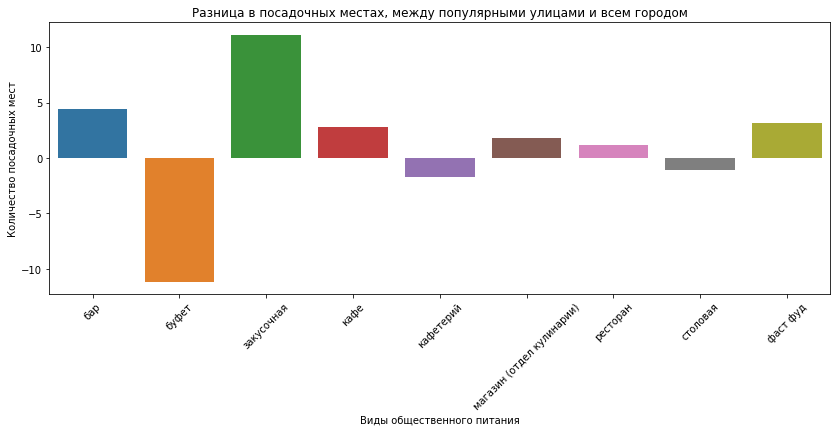

In [67]:
d = (top10_df.groupby('object_type').number.agg(['mean']) - df.groupby('object_type').number.agg(['mean'])).reset_index()
plt.figure(figsize=(14,5))
sbr.barplot(x='object_type', y='mean', data = d)
plt.title('Разница в посадочных местах, между популярными улицами и всем городом')
plt.xlabel('Виды общественного питания')
plt.ylabel('Количество посадочных мест')

plt.xticks(rotation=45)
plt.show()

In [69]:
(top10_df.groupby('object_type').number.agg(['mean', 'count'])['count'] / top10_df.groupby('object_type').number.agg(['mean', 'count'])['count'].sum() - df.groupby('object_type').number.agg(['mean', 'count'])['count'] / df.groupby('object_type').number.agg(['mean', 'count'])['count'].sum()) * 100

object_type
бар                         -1.340424
буфет                       -1.737967
закусочная                  -1.435148
кафе                         2.537095
кафетерий                    1.175425
магазин (отдел кулинарии)   -0.277085
ресторан                     1.148566
столовая                    -4.642271
фаст фуд                     4.571809
Name: count, dtype: float64

**Вывод:**

Ситуация на популярных улицах с заведениями общественного питания отличается от средней по городу. На популярных улицах, меньше мест в буфетах, но больше в закусочных, фаст фудах и барах. Также меньше столовых, но больше фаст фудов.    

## Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

**Вывод**

По-моему, у нас маловато инфы для того, чтобы делать выводы о том, где можно открыть заведение общепита. Но я заметил, что в Москве маловато кулинарий, без них есть куча улиц. На половине районов юго-восточного округа нету пекарен, из-имеющихся данных это отличные места, чтобы открыть там кулинарии.

In [92]:
df_bakery = df.query('object_type == "магазин (отдел кулинарии)"')
fig = go.Figure()
fig.add_trace(
    go.Scattermapbox(
    lat=df_bakery['displayLatitude'], lon=df_bakery['displayLongitude'], 
    text = df_bakery['object_name'], name=object_type, 
    marker=dict(size=8)
        )
    )
map_center = go.layout.mapbox.Center(lat=55.72931, lon=37.61108)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10), width=800, height=800, title='Расположение кулинарий')

fig.show()


https://disk.yandex.ru/i/yAqtbFJug4P2eA когда-нибудь тут будет нормальная презентация

Хотелось бы спросить совета по оформлению и узнать есть ли ошибки в решении. Я не особо понимаю, как нормально структурировать презентацию, потому что мне, кажется, у нас недостаточно данных чтобы ответить на основной вопрос проекта.